### Machine Learning Project - Decision Tree Classifier

This project aims to build a Machine Learning model that predicts whether a credit card holder will default their next credit card payment based on various factors.

Read the more descriptive article I wrote on Medium [here]().

[Link](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients) to original dataset.

Prepared by: [Faiz Yah](https://www.linkedin.com/in/faizyah/) ^^

Klang, Malaysia. 28th September 2024

Step 1: Import libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.tree import plot_tree

Step 2: Import Data

In [2]:
path_file = '/Users/fabienyah/Documents/0 data science hehe/0 Portfolio/6. Decision Tree - Default Credit Card/dataset_credit.xls'

df = pd.read_excel(path_file, header=1)

Step 3: Exploratory Data Analysis 

In [3]:
#Identify amount of rows (instances) and columns (features)

df.shape

(30000, 25)

In [4]:
#Check first 5 rows

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
#Descriptive statistics for each features

df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
#Identify data type of columns, it seems all are integers

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

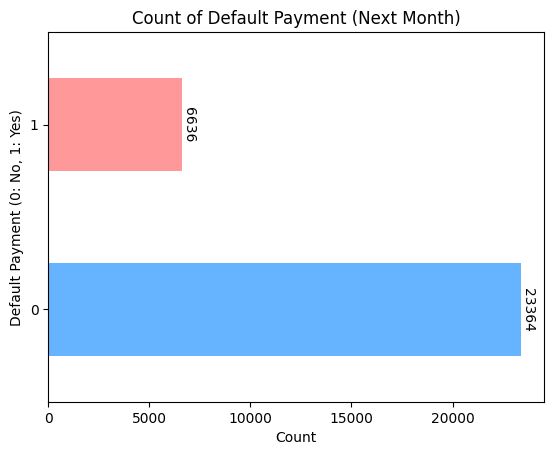

In [7]:
#Identify quantity of target (0 or 1), to validate whether it is balanced or unbalanced data

colors = ['#66b3ff','#ff9999']
ax = df['default payment next month'].value_counts().plot(kind='barh', color=colors)
plt.title('Count of Default Payment (Next Month)')
plt.xlabel('Count')
plt.ylabel('Default Payment (0: No, 1: Yes)')
ax.bar_label(ax.containers[0], label_type='edge', rotation=270)
plt.show()

Out of the 30k rows, it seems that the 23364 of them are considered non-default "0" , while 6636 of them are considered as default "1".

Hence we can deduced that it is an unbalanced data, we need to take it into account, and modify our data set accordingly.

Step 4: Handling imbalanced data

There are 2 ways to deal with imbalanced data, upsampling and downsampling. For this project, we will be using the upsampling method.

In [8]:
#Create majority and minority class
majority_class = df[df['default payment next month'] == 0]
minority_class = df[df['default payment next month'] == 1]

#Upsample the minority class
minority_upsampled = resample(minority_class,
                              replace=True,  # Sample with replacement
                              n_samples=len(majority_class))  # Match number of majority class samples

#Create new dataframe with majority class + upsampled minority class
df_upsampled = pd.concat([majority_class, minority_upsampled])

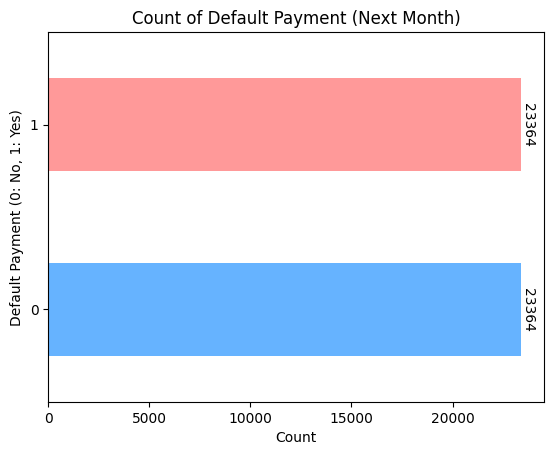

In [9]:
ax = df_upsampled['default payment next month'].value_counts().plot(kind='barh', color=colors)
plt.title('Count of Default Payment (Next Month)')
plt.xlabel('Count')
plt.ylabel('Default Payment (0: No, 1: Yes)')
ax.bar_label(ax.containers[0], label_type='edge', rotation=270)
plt.show()

We now have equal amount of '0' and '1' for out target variable, hence it is now a balanced data.

Step 5: Split our data set to training sets and testing sets

In [10]:
X_upsampled = df_upsampled.drop(columns=['default payment next month'])
y_upsampled = df_upsampled['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.2)

Step 6: Create our machine learning model

In [11]:
model = DecisionTreeClassifier()

Step 7: Train our machine learning model

In [12]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

Step 8: Make prediction using the testing sets

In [13]:
predicted_target = model.predict(X_test)

Step 9: Evaluate our model

In [14]:
print(y_test.shape)
print(predicted_target.shape)

d={'Predicted': predicted_target, 'Actual':y_test}
comparison = pd.DataFrame(data = d)
comparison

(9346,)
(9346,)


,Predicted,Actual
24793,1,1
20411,0,0
29204,1,0
26332,1,0
7452,1,1
...,...,...
2753,1,1
11305,1,1
21314,1,1
28718,0,0


In [15]:
classi_report = classification_report(y_test, predicted_target)
confus_matrix = confusion_matrix(y_test, predicted_target)

print(classi_report)
print(confus_matrix)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      4650
           1       0.83      0.96      0.89      4696

    accuracy                           0.88      9346
   macro avg       0.89      0.88      0.88      9346
weighted avg       0.89      0.88      0.88      9346

[[3740  910]
 [ 180 4516]]


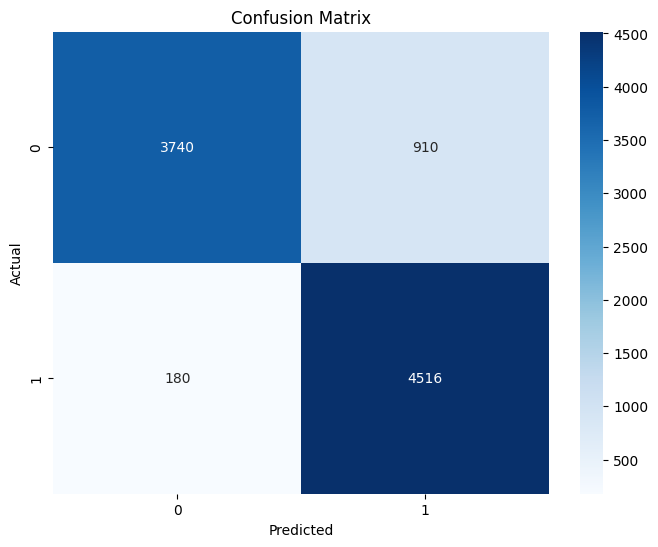

In [16]:
#Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confus_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

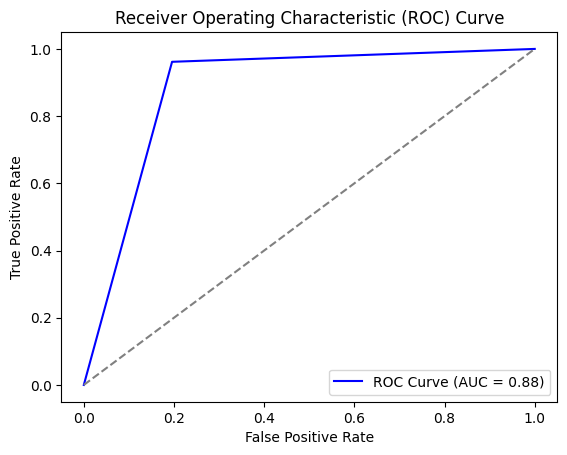

In [17]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_target) #False Positive Rate and True Positive Rate
roc_auc = auc(fpr, tpr)

# Plot
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()